In [1]:
import cv2
import pylab as plt
import numpy as np

%matplotlib inline

In [4]:
img = cv2.imread('imgs/barcode1.png')

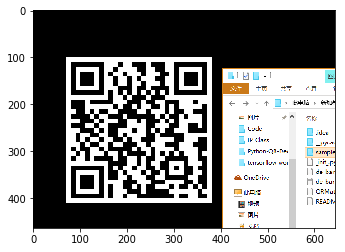

In [5]:
plt.imshow(img)

In [6]:
# 获得灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 高斯滤波=>消除部分噪声
img_gb = cv2.GaussianBlur(img_gray, (5,5), 0)
# Canny边缘检测
edges = cv2.Canny(img_gray, 100, 200)

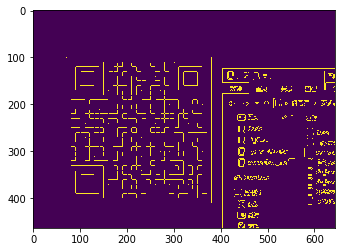

In [7]:
plt.imshow(edges)

[508, 610, 619]


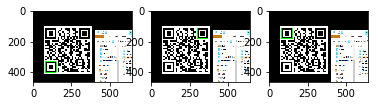

In [8]:
# 判断三个方形区域， 通过边缘嵌套》5层（应该是有6层）
img_fc, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
hierarchy = hierarchy[0]
found = []
for i in range(len(contours)):
    k = i
    c = 0
    while hierarchy[k][2] != -1:
        k = hierarchy[k][2]
        c += 1
    if c >= 5:
        found.append(i)
print(found)
j = 1
for i in found:
    img_dc = img.copy()
    cv2.drawContours(img_dc, contours, i, (0, 255, 0), 3)
    plt.subplot(130+j)
    plt.imshow(img_dc)
    j+=1

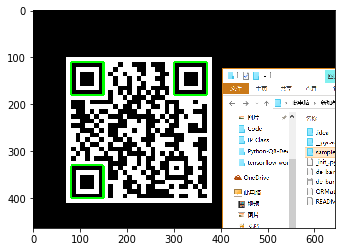

In [9]:
# 获取三个方形区域
img_dc = img.copy()
for i in found:
    cv2.drawContours(img_dc, contours, i, (0, 255, 0), 3)
    
plt.imshow(img_dc)

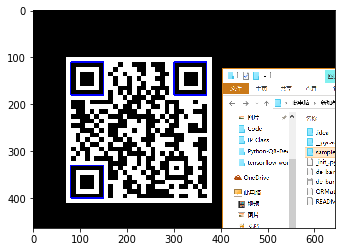

In [10]:
# 给方形区域嵌套最小矩形
draw_img = img.copy()
for i in found:
    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int64(box)
    cv2.drawContours(draw_img, [box], 0, (0, 0, 255), 2)
plt.imshow(draw_img)

In [11]:
# 获取所有方形区域定点， 用于绘制整体的最小外接矩形
contour_all = []
for i in found:
    for j in contours[i]:
        contour_all.append(j)
contour_all = np.array(contour_all)

In [12]:
rect = cv2.minAreaRect(contour_all)
box = cv2.boxPoints(rect)
box = np.array(box)

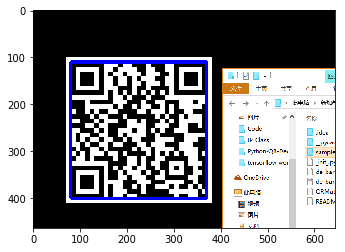

In [51]:
res_img = img.copy()
cv2.polylines(res_img, np.int32([box]), True, (0, 0, 255), 5)
plt.imshow(res_img)

In [28]:
# 通过最小外接矩形的定点获取目标区域定点坐标                                                                                         
X = box[:, 0].astype('int')
Y = box[:, 1].astype('int')
x1, x2 = X.min(), X.max()
y1, y2 = Y.min(), Y.max()
print(x1, x2, y1, y2)

80 370 110 400


In [63]:
# 提取目标区域并转化成二值图像
region = img_gray[y1:y2, x1:x2]
binary = region.copy()
ret,binary=cv2.threshold(binary,127,255,cv2.THRESH_BINARY)

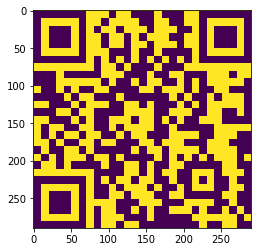

In [65]:
plt.imshow(binary)

In [58]:
from imgs import QRMatrix

In [59]:
QRCode = QRMatrix.QRMatrix('decode', binary)

In [60]:
QRCode.decode()

'testing error. what about now. and now?'